# Multiple Linear Regression


Dataset Source: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011). 
Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#importing the dataset

data = pd.read_excel("data/CCPP/CCPP.xlsx")

data.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [3]:
# Check for missing values

print(data.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [4]:
#defining our X and Y

X = data.drop(['PE'],axis = 1)
Y = data['PE']

In [5]:
print(X)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [6]:
print(Y)


0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


### Splitting our dataset into training and testing


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.2, random_state=0)

### Creating our model


In [8]:
LINREG = LinearRegression()
LINREG.fit(X_train, Y_train)

LinearRegression()

### Use the model to predict test results

In [9]:
Y_pred = LINREG.predict(X_test)

print(Y_pred)


[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [10]:
#Prediction values
pred_df = pd.DataFrame({'Actual Value':Y_test, 'Predicted Value':Y_pred, 'Difference': Y_test - Y_pred,
                        '% Difference': 100*np.abs(Y_test-Y_pred)/np.average(Y_test+Y_pred)})

pred_df

,Actual Value,Predicted Value,Difference,% Difference
4834,431.23,431.427616,-0.197616,0.021735
1768,460.01,458.561246,1.448754,0.159343
2819,461.14,462.752647,-1.612647,0.177369
7779,445.90,448.595962,-2.695962,0.296518
7065,451.29,457.870777,-6.580777,0.723794
...,...,...,...,...
6452,460.29,463.634916,-3.344916,0.367894
794,452.42,457.035484,-4.615484,0.507639
627,473.26,469.518359,3.741641,0.411529
3515,438.00,442.417595,-4.417595,0.485874


### Evaluating the Model

In [11]:
R2_score = r2_score(Y_test,Y_pred)

print(R2_score)

0.9325315554761302


 We have a model that is 93% accurate


### Visualization

Text(0.5, 1.0, 'Actual vs Predicted Values')

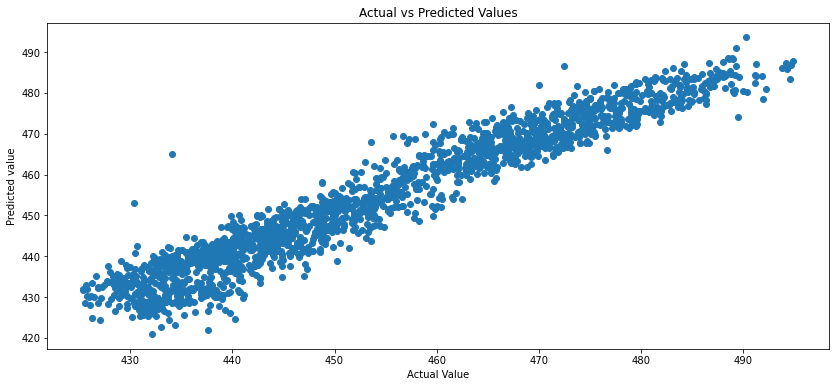

In [12]:
plt.figure(figsize=(14,6))
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted Values")